Each machine learning algorithm has strengths and weaknesses. Bagged tree models use many trees to protect individual decision trees from overfitting. However, bagged tree models are not without weaknesses. Suppose you have one very strong feature in a dataset, most of the trees will use that feature as the top split. This will result in many similar trees. You can think of Random forests as a variant of a bagged tree model. The difference is that each time a split is considered, only a portion of the total number of features are split candidates. In short, Random Forests make the decision trees less correlated.  

![images](images/randomForest.png)
In this video, I'll share with you how you can build a random forest model using Scikit-Learn. 

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

# Classifer Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# To visualize individual decision trees
from sklearn import tree
from sklearn.tree import export_text

## Load the Dataset
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The code below loads the dataset. The goal of this dataset is to predict price based on features like number of bedrooms and bathrooms

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# This notebook only selects a couple features for simplicity
# However, I encourage you to play with adding and substracting features
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']

X = df.loc[:, features]

y = df.loc[:, 'price'].values

## Splitting Data into Training and Test Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Note, another benefit of bagged trees like decision trees is that you don’t have to standardize your features unlike other algorithms like logistic regression and K-Nearest Neighbors. 

## Random Forest 

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [5]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.ensemble import RandomForestRegressor

<b>Step 2:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. 

In [6]:
reg = RandomForestRegressor(n_estimators=100, random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between X (features like number of bedrooms) and y (price)

In [7]:
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

<b>Step 4:</b> Predict the labels of new data (new flowers)

Uses the information the model learned during the model training process

In [8]:
# Returns a NumPy Array
# Predict for One Observation
reg.predict(X_test.iloc[0].values.reshape(1, -1))

array([354008.56])

Predict for Multiple Observations at Once

In [9]:
reg.predict(X_test[0:10])

array([ 354008.56,  999809.  ,  443760.25,  426332.  ,  760570.2 ,
        408775.5 ,  360030.14,  714794.4 ,  585902.14, 1665779.  ])

## Measuring Model Performance

Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [10]:
score = reg.score(X_test, y_test)
print(score)

0.577684658845681


## Visualizing Individual Decision Trees from a Bagged Tree and Random Forest Model
The purpose of this section is to show you that both ensemble models are really comprised of many decision trees.

In [11]:
# Load the Iris Dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [12]:
# Fir Bagged Tree Model
btc = BaggingClassifier(n_estimators=100, 
                        random_state = 1)

btc.fit(X_train, y_train)

# Fit Random Forest Model
rfc = RandomForestClassifier(n_estimators=100, random_state = 1)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

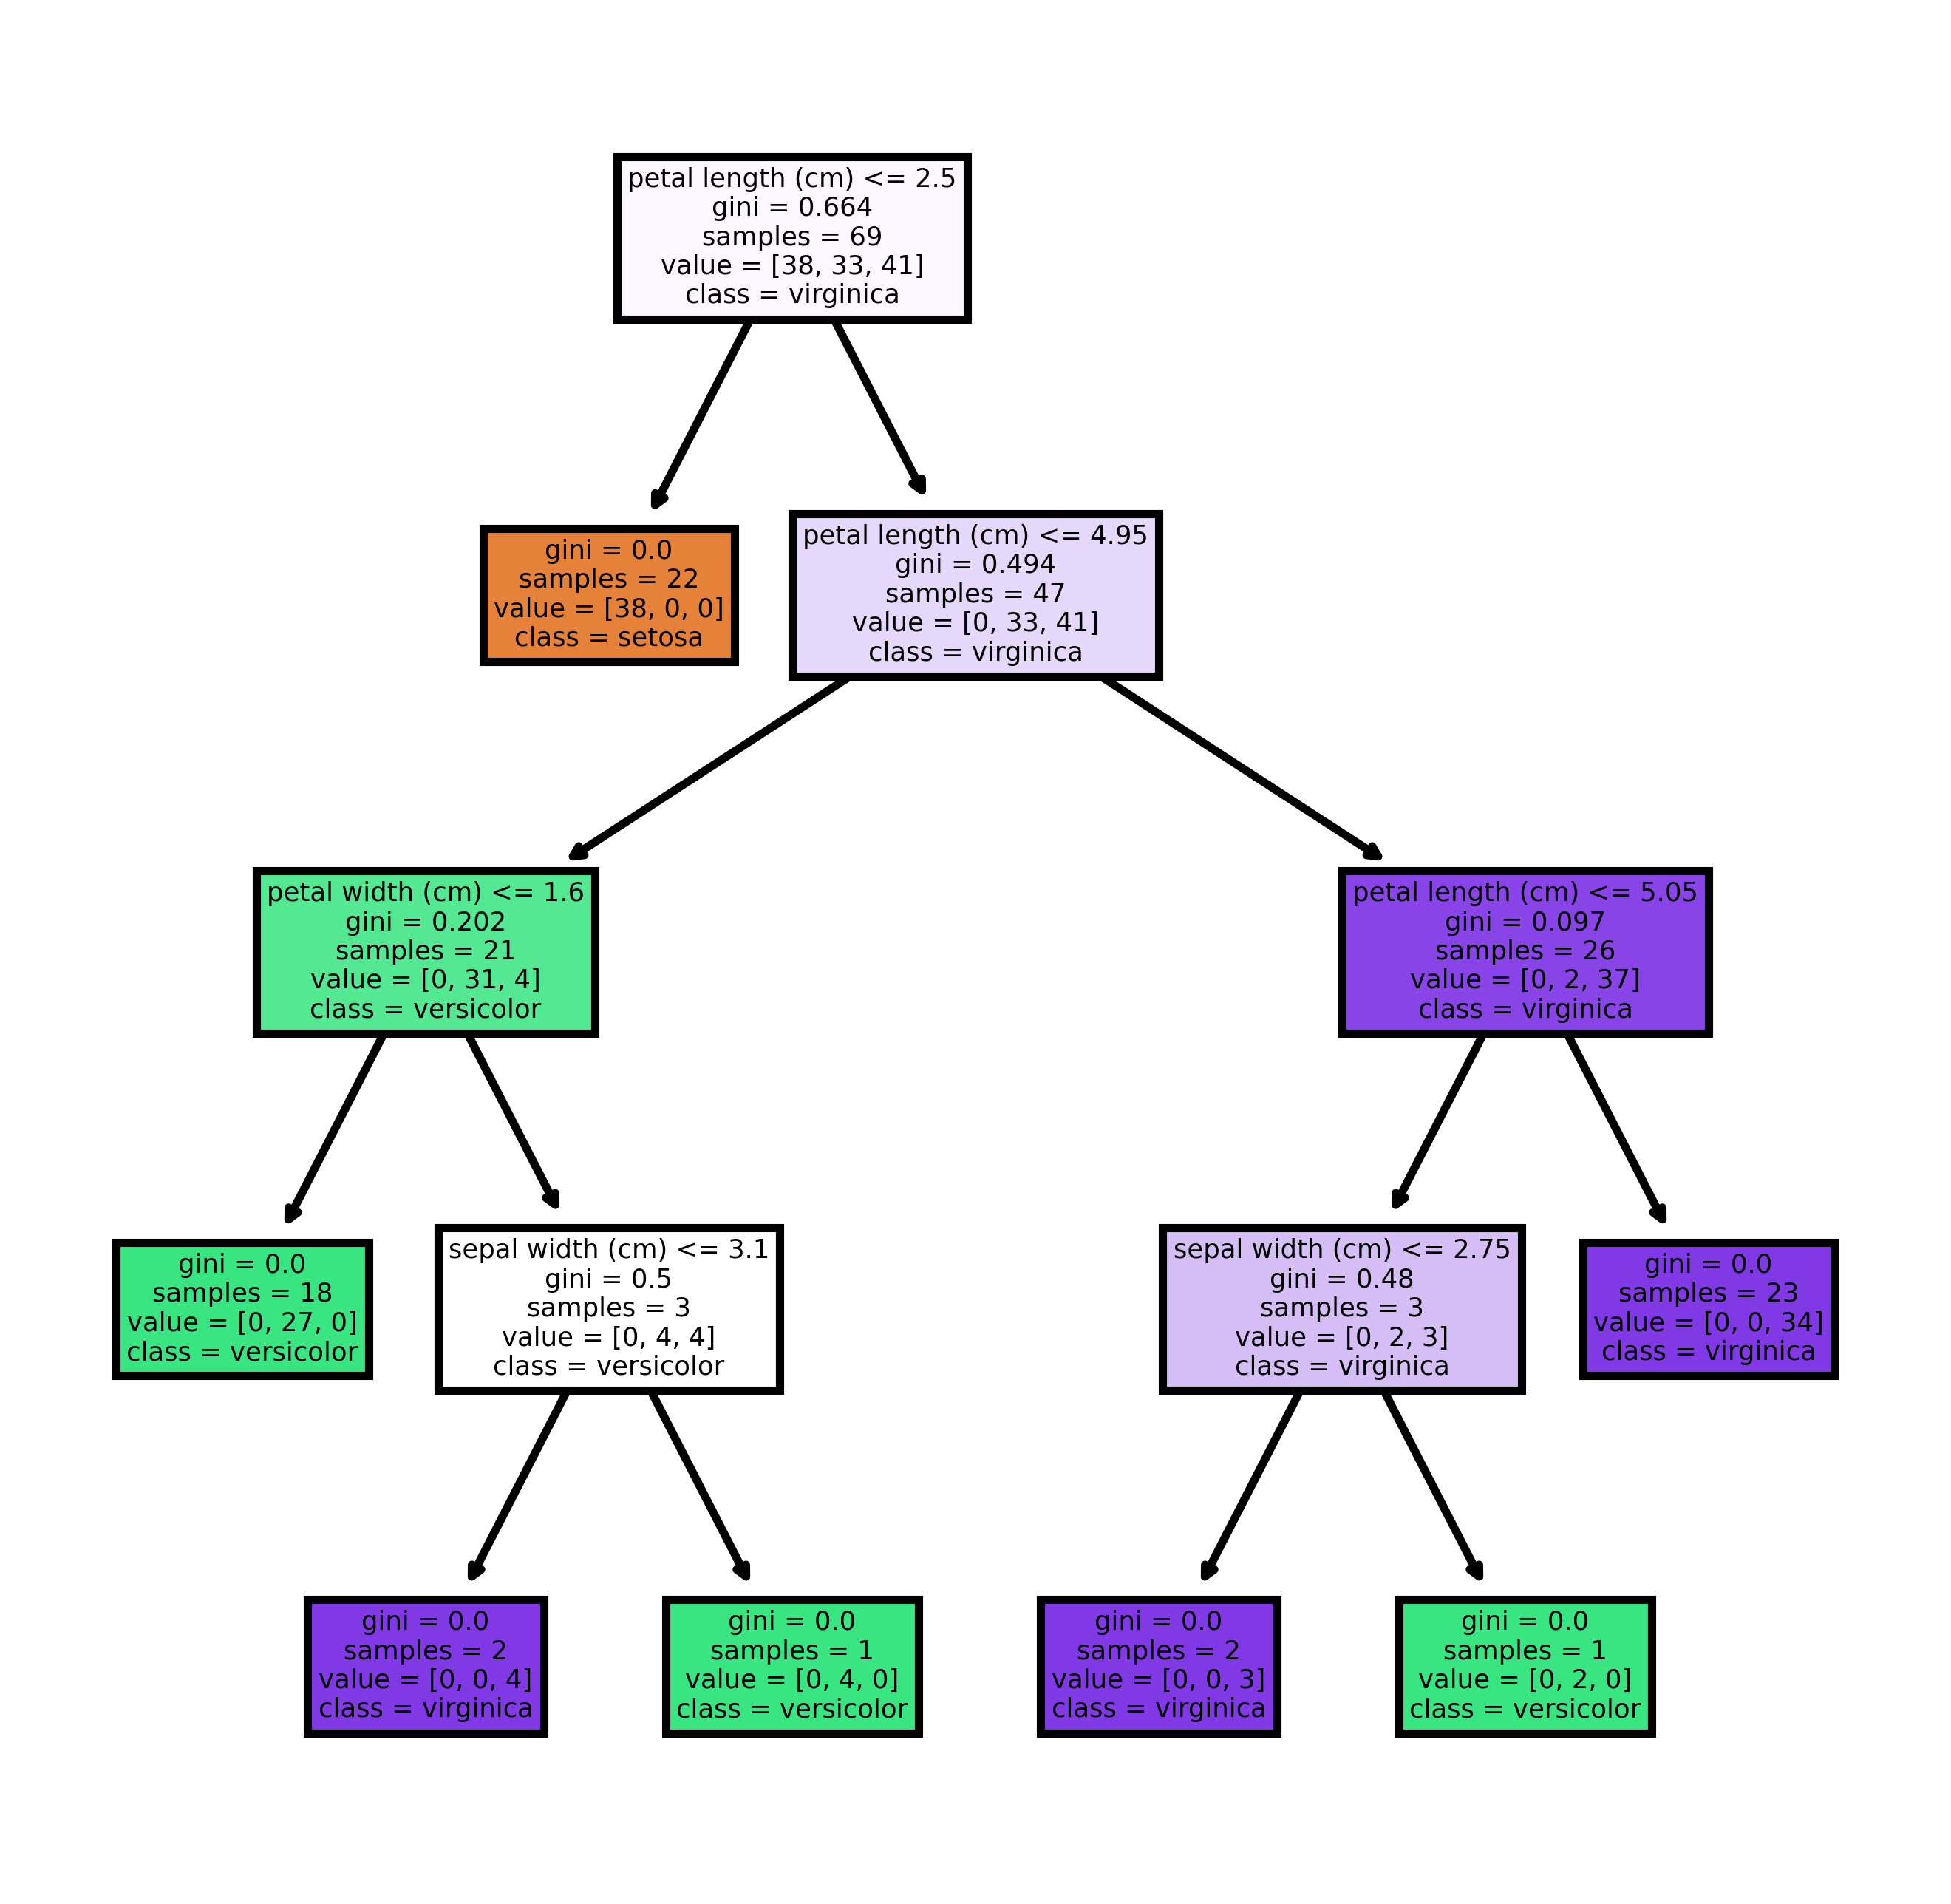

In [13]:
# Get the first decision tree for bagged tree model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(btc.estimators_[0],
               feature_names = data.feature_names, 
               class_names=data.target_names,
               filled = True);

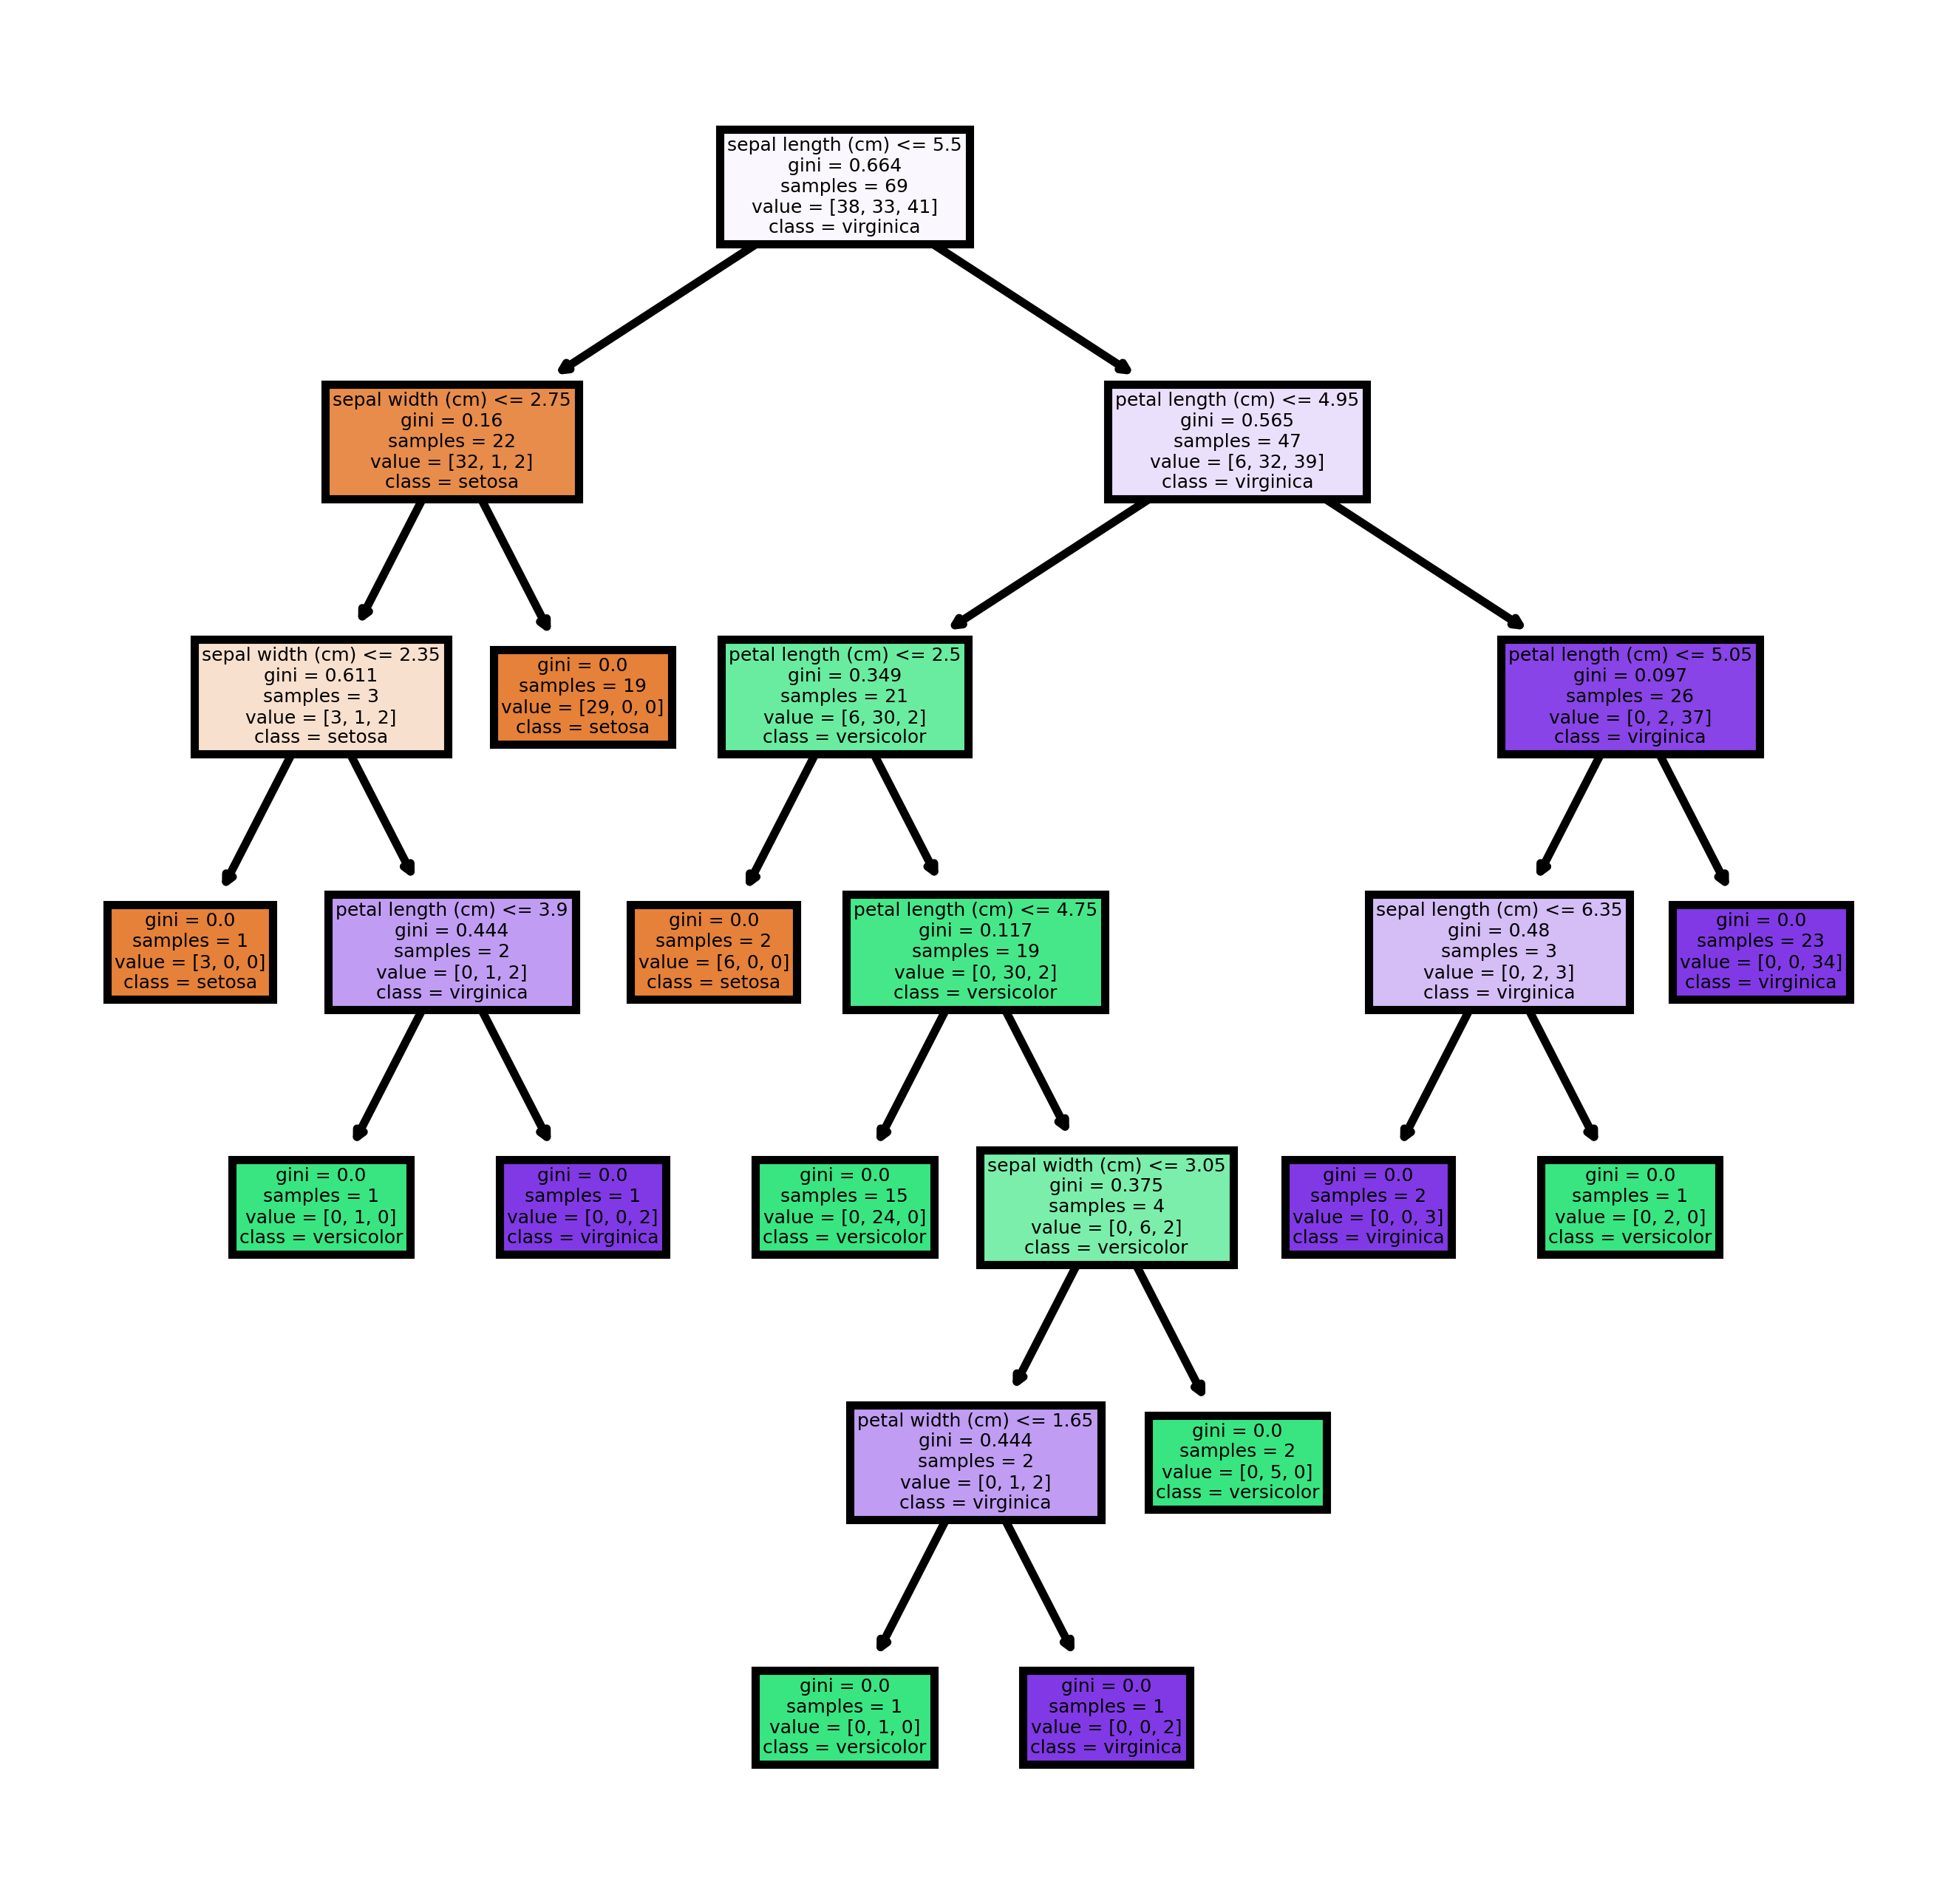

In [14]:
# Get the first decision tree for a random forest model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names = data.feature_names, 
               class_names=data.target_names,
               filled = True);

## Feature Importance
Random Forests give feature importance metrics. Like any metric, it isn't perfect. 

In [15]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [16]:
importances

,feature,importance
2,petal length (cm),0.453
3,petal width (cm),0.385
0,sepal length (cm),0.139
1,sepal width (cm),0.023


So that's it, I encourage you to build a random forest model.